# HW 1-1: Deep vs. Shallow
### Adam Patyk
### CPSC 8430

## Part 1: Simulate a function

In [1]:
import math
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

### Create models and validate number of parameters

# hyperparameters
epochs = 20000
input_size = 1
output_size = 1
shallow_hidden_size = 200
mod_hidden_sizes = [12, 22]
deep_hidden_size = 8

# Model 0
class ShallowNetwork(nn.Module):
    def __init__(self):
        super(ShallowNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, shallow_hidden_size),
            nn.ReLU(),
            nn.Linear(shallow_hidden_size, output_size),
        )

    def forward(self, x):
        return self.model(x)

# Model 1
class ModerateNetwork(nn.Module):
    def __init__(self):
        super(ModerateNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, mod_hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(mod_hidden_sizes[0], mod_hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(mod_hidden_sizes[1], mod_hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(mod_hidden_sizes[0], output_size),
        )

    def forward(self, x):
        return self.model(x)

# Model 2
class DeepNetwork(nn.Module):
    def __init__(self):
        super(DeepNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, deep_hidden_size),
            nn.ReLU(),
            nn.Linear(deep_hidden_size, deep_hidden_size),
            nn.ReLU(),
            nn.Linear(deep_hidden_size, deep_hidden_size),
            nn.ReLU(),
            nn.Linear(deep_hidden_size, deep_hidden_size),
            nn.ReLU(),
            nn.Linear(deep_hidden_size, deep_hidden_size),
            nn.ReLU(),
            nn.Linear(deep_hidden_size, deep_hidden_size),
            nn.ReLU(),
            nn.Linear(deep_hidden_size, deep_hidden_size),
            nn.ReLU(),
            nn.Linear(deep_hidden_size, deep_hidden_size),
            nn.ReLU(),
            nn.Linear(deep_hidden_size, deep_hidden_size),
            nn.ReLU(),
            nn.Linear(deep_hidden_size, output_size),
        )

    def forward(self, x):
        return self.model(x)

models = []
models.append(ShallowNetwork())
models.append(ModerateNetwork())
models.append(DeepNetwork())

for i in range(len(models)):
    num_params = sum(p.numel() for p in models[i].parameters())
    print(f'Model {i} parameters: {num_params}')
    

Model 0 parameters: 601
Model 1 parameters: 599
Model 2 parameters: 601


In [2]:
### Create data for training

# Dataset for function data (e^x * sin^2(3*pi*x))
class FunctionDataset(Dataset):
    def __init__(self, size, start, end):
        data = np.zeros((size, 2))
        data[:, 0] = np.arange(start, end, 1/size)
        data[:, 1] = np.exp(data[:, 0]) * np.sin(3 * math.pi * data[:, 0]) ** 2
        data = torch.from_numpy(data).float()
        self.x = data
        self.mean = torch.mean(data)
        self.stddev = torch.std(data)
    
    def __getitem__(self, index):
        return self.x[index]

    def __len__(self):
        return len(self.x)

    def __mean__(self):
        return self.mean

    def __stddev__(self):
        return self.stddev

    def standardize(self):
        data = (self.x - self.mean) / self.stddev

        return data

# create 100 data points from function e^x * sin^2(3*pi*x) [0, 1]
raw_data = FunctionDataset(100, 0, 1)

# z-score standardize training data
training_data = raw_data.standardize()

# create data loader for batch training
training_loader = DataLoader(training_data, batch_size=1, shuffle=True)

print('Data ready.')

Data ready.


In [3]:
### Train models (skip section if models already trained) [est. time: ~2 hours]

def train(model, data_loader, epochs):
    optimizer = optim.Adam(model.parameters())  # use adaptive learning rate over stochastic gradient descent
    loss_func = nn.MSELoss()                    # use mean-squared error loss function
    model.zero_grad()
    training_loss = []

    start_time = time.time()
    for epoch in range(epochs):
        epoch_loss = 0.0
        for datum in data_loader:
            input, target = datum[0][0].reshape(-1), datum[0][1].reshape(-1)
            optimizer.zero_grad()
            output = model(input)
            loss = loss_func(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        epoch_loss /= len(data_loader)
        training_loss.append(epoch_loss)
        if epoch % 1000 == 999: # print every 1000 epochs
            print(f'Epoch: {epoch+1}/{epochs} \tLoss: {epoch_loss:.6f}', flush=True)
    
    total_time = (time.time() - start_time)
    print(f'Training time: {total_time//60:.0f} min {total_time%60:.2f} s')

    return training_loss

# train each model and save results to .txt file
training_loss = []
for i in range(len(models)):
    print(f'Training model {i}:')
    loss_arr = train(models[i], training_loader, epochs)
    training_loss.append(loss_arr)
    torch.save(models[i], f'func_models/model{i}.pt')
np.savetxt('func_models/training_loss.txt', np.array(training_loss))

Training model 0:
Epoch: 1000/20000 	Loss: 0.011395
Epoch: 2000/20000 	Loss: 0.010246
Epoch: 3000/20000 	Loss: 0.009753
Epoch: 4000/20000 	Loss: 0.008064
Epoch: 5000/20000 	Loss: 0.013301
Epoch: 6000/20000 	Loss: 0.011483
Epoch: 7000/20000 	Loss: 0.023511
Epoch: 8000/20000 	Loss: 0.011053
Epoch: 9000/20000 	Loss: 0.006970
Epoch: 10000/20000 	Loss: 0.004623
Epoch: 11000/20000 	Loss: 0.003595
Epoch: 12000/20000 	Loss: 0.005860
Epoch: 13000/20000 	Loss: 0.006363
Epoch: 14000/20000 	Loss: 0.004389
Epoch: 15000/20000 	Loss: 0.009234
Epoch: 16000/20000 	Loss: 0.006143
Epoch: 17000/20000 	Loss: 0.005864
Epoch: 18000/20000 	Loss: 0.005848
Epoch: 19000/20000 	Loss: 0.006442
Epoch: 20000/20000 	Loss: 0.002039
Training time: 17 min 14.22 s
Training model 1:
Epoch: 1000/20000 	Loss: 0.004491
Epoch: 2000/20000 	Loss: 0.002864
Epoch: 3000/20000 	Loss: 0.003584
Epoch: 4000/20000 	Loss: 0.002625
Epoch: 5000/20000 	Loss: 0.004067
Epoch: 6000/20000 	Loss: 0.003097
Epoch: 7000/20000 	Loss: 0.002780
Epoch

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


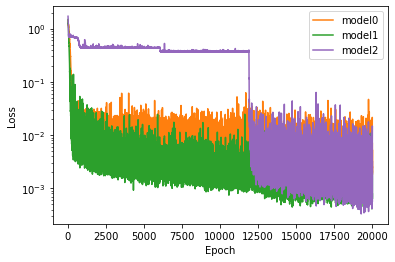

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


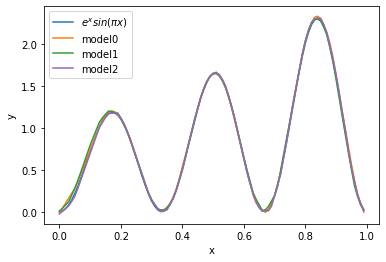

In [5]:
### Plot results

def inverse_standardize(data, mean, stddev):
    data = data * stddev + mean
    return data

# load data from previous training
models = []
models.append(torch.load('func_models/model0.pt'))
models.append(torch.load('func_models/model1.pt'))
models.append(torch.load('func_models/model2.pt'))

training_loss = np.loadtxt('func_models/training_loss.txt')
colors = ['tab:orange', 'tab:green', 'tab:purple']

# plot loss over epochs
for i in range(len(models)):
    plt.plot(np.arange(0, epochs), training_loss[i], color=colors[i], label=f'model{i}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.savefig('func_models/loss_comparison.eps')
plt.show()

# plot values from final model
plt.plot(raw_data[:, 0], raw_data[:, 1], label=r'$e^xsin(\pi x)$')
for i in range(len(models)):
    func_vals = []
    for datum in training_data:
        input = datum[0].reshape(-1)
        output = models[i](input)
        output = inverse_standardize(output, raw_data.mean, raw_data.stddev)
        func_vals.append(output)
    plt.plot(raw_data[:, 0], func_vals, color=colors[i],label=f'model{i}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('func_models/output_comparison.eps')
plt.show()

## Part 2: Train on MNIST

In [8]:
import time
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

### Create models

# hyperparameters
epochs = 150
img_batch_size = 32
learning_rate = 0.01
momentum = 0.9

input_size = 1
output_size = 10
kernel_size = 3
pool_size = 2
conv_sizes = [16, 32]
fc_size = 20

class ShallowCNN(nn.Module):
    def __init__(self):
        super(ShallowCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(input_size, conv_sizes[0], kernel_size),
            nn.MaxPool2d(pool_size, pool_size),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(2704, fc_size),
            nn.ReLU(),
            nn.Linear(fc_size, output_size)
        )

    def forward(self, x):
        return self.model(x)

class ModerateCNN(nn.Module):
    def __init__(self):
        super(ModerateCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(input_size, conv_sizes[0], kernel_size),
            nn.MaxPool2d(pool_size, pool_size),
            nn.ReLU(),
            nn.Conv2d(conv_sizes[0], conv_sizes[1], kernel_size),
            nn.MaxPool2d(pool_size, pool_size),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(800, fc_size),
            nn.ReLU(),
            nn.Linear(fc_size, output_size)
        )

    def forward(self, x):
        return self.model(x)

class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(input_size, conv_sizes[0], kernel_size),
            nn.MaxPool2d(pool_size, pool_size),
            nn.ReLU(),
            nn.Conv2d(conv_sizes[0], conv_sizes[1], kernel_size),
            nn.MaxPool2d(pool_size, pool_size),
            nn.ReLU(),
            nn.Conv2d(conv_sizes[1], conv_sizes[1], kernel_size),
            nn.MaxPool2d(pool_size, pool_size),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32, fc_size),
            nn.ReLU(),
            nn.Linear(fc_size, output_size)
        )

    def forward(self, x):
        return self.model(x)

models = []
models.append(ShallowCNN())
models.append(ModerateCNN())
models.append(DeepCNN())

print('Models ready.')

Models ready.


In [9]:
### Load data, normalized (mean = 0.5, stddev = 0.5)

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

training_set = torchvision.datasets.MNIST(root='./data/', train=True, 
                                            download=True, transform=transform)
training_loader = torch.utils.data.DataLoader(training_set, batch_size=img_batch_size,
                                          shuffle=True, num_workers=4)

testing_set = torchvision.datasets.MNIST(root='./data/', train=False,
                                            download=True, transform=transform)
testing_loader = torch.utils.data.DataLoader(testing_set, batch_size=img_batch_size,
                                         shuffle=False, num_workers=4)

print('Data ready.')

Data ready.


In [10]:
### Train models (skip section if models already trained) [est. time: 1 hour]

def train(model, data_loader, epochs):
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum) # stochastic gradient descent
    loss_func = nn.CrossEntropyLoss()   # Cross entropy categorical loss function
    model.zero_grad()
    model.train()

    overall_loss = []
    start_time = time.time()
    for epoch in range(epochs):
        epoch_loss = 0.0
        for data, target in data_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = loss_func(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        epoch_loss /= len(data_loader)
        overall_loss.append(epoch_loss)
        if epoch % 10 == 9: # print every 10 epochs
            print(f'Epoch: {epoch+1}/{epochs} \tLoss: {epoch_loss:.6f}', flush=True)
    total_time = (time.time() - start_time)
    print(f'Training time: {total_time//60:.0f} min {total_time%60:.2f} s', flush=True)

    return overall_loss

# train each model and save results to .txt file
training_loss = []

for i in range(len(models)):
    print(f'Training model {i}:')
    loss_arr = train(models[i], training_loader, epochs)
    training_loss.append(loss_arr)
    torch.save(models[i], f'mnist_models/model{i}.pt')

np.savetxt('mnist_models/training_loss.txt', np.array(training_loss))

Training model 0:
Epoch: 10/150 	Loss: 0.012805
Epoch: 20/150 	Loss: 0.000498
Epoch: 30/150 	Loss: 0.000143
Epoch: 40/150 	Loss: 0.000091
Epoch: 50/150 	Loss: 0.000066
Epoch: 60/150 	Loss: 0.000051
Epoch: 70/150 	Loss: 0.000042
Epoch: 80/150 	Loss: 0.000036
Epoch: 90/150 	Loss: 0.000031
Epoch: 100/150 	Loss: 0.000027
Epoch: 110/150 	Loss: 0.000024
Epoch: 120/150 	Loss: 0.000022
Epoch: 130/150 	Loss: 0.000020
Epoch: 140/150 	Loss: 0.000018
Epoch: 150/150 	Loss: 0.000016
Training time: 25 min 0.33 s
Training model 1:
Epoch: 10/150 	Loss: 0.011779
Epoch: 20/150 	Loss: 0.003468
Epoch: 30/150 	Loss: 0.000641
Epoch: 40/150 	Loss: 0.000024
Epoch: 50/150 	Loss: 0.000015
Epoch: 60/150 	Loss: 0.000011
Epoch: 70/150 	Loss: 0.000009
Epoch: 80/150 	Loss: 0.000007
Epoch: 90/150 	Loss: 0.000006
Epoch: 100/150 	Loss: 0.000006
Epoch: 110/150 	Loss: 0.000005
Epoch: 120/150 	Loss: 0.000004
Epoch: 130/150 	Loss: 0.000004
Epoch: 140/150 	Loss: 0.000004
Epoch: 150/150 	Loss: 0.000003
Training time: 34 min 2

In [11]:
### Test models

def test(model, data_loader):
    loss_func = nn.CrossEntropyLoss()   # Cross entropy categorical loss function

    model.eval()
    testing_loss = 0.0
    correct = 0

    with torch.no_grad():
        for data, target in data_loader:
            output = model(data)
            loss = loss_func(output, target)
            testing_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            correct += (predicted == target).sum().item()
    total = len(data_loader.dataset)
    testing_loss /= total
    testing_acc = correct / total * 100
    print(f'Accuracy: {correct}/{total} ({testing_acc:.2f}%)\tLoss: {testing_loss:.6f}', flush=True)

# load data from previous training
models = []
models.append(torch.load('mnist_models/model0.pt'))
models.append(torch.load('mnist_models/model1.pt'))
models.append(torch.load('mnist_models/model2.pt'))

# test each model and save results to .txt file
testing_loss = []
for i in range(len(models)):
    print(f'Testing model {i}:')
    loss_arr = test(models[i], testing_loader)
    testing_loss.append(loss_arr)

Testing model 0:
Accuracy: 9862/10000 (98.62%)	Loss: 0.003012
Testing model 1:
Accuracy: 9912/10000 (99.12%)	Loss: 0.002005
Testing model 2:
Accuracy: 9884/10000 (98.84%)	Loss: 0.004500


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


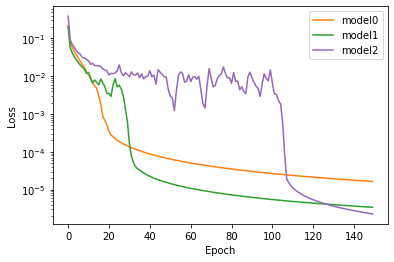

In [12]:
### Plot results
import matplotlib.pyplot as plt

#training_loss = np.loadtxt('mnist_models/training_loss.txt')
colors = ['tab:orange', 'tab:green', 'tab:purple']

# plot loss over epochs
for i in range(len(models)):
    plt.plot(np.arange(0, epochs), training_loss[i], color=colors[i], label=f'model{i}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.savefig('mnist_models/training_loss_comparison.eps')
plt.show()